<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 2- Exploratory Data Analysis

_for Ideas DataFrame compiled in Notebook 1_

---
### Notebook Summary
  - Checking for missing data and investigating data types
  - Filtering out incorrect tickers and 'Editor's Picks'
  - Datatype conversion via Pandas "datetime" functionality, allowing for proper interpretation, analysis, and modelling
  - Summary statistics to discover the scope of the data produced by the webscrapers from Notebook 1 
  - Visualizations of feature frequenices and distributions to assist in discovering meaningful correlations and narrow the scope of the data for modelling purposes, including creation of both Long and Short Portfolios
  - Compiling "Final Ideas" DataFrame, saving and exporting as csv file for accessibility throughout the remainder of the notebooks
---
#### Importing Necessary Libraries & "Ideas" DataFrame

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
ideas = pd.read_csv('IDEAS.csv')  # Compiled via webscrape in Notebook 1

---
## Let's Check It Out!
---

In [59]:
ideas.head(3)  # Inspecting head 

,Authors,Date,Link,Tickers,Title,Strategy
0,Dirk Leach,"Apr. 4, 2016, 11:12 AM",/article/3962952-lng-carrier-just-doubled-back...,DLNG,This LNG Carrier Just Doubled Its Backlog And ...,Long
1,Eric Sprague,"Apr. 4, 2016, 11:07 AM",/article/3962940-2015-intrinsic-value-brookfie...,BAM,2015 Intrinsic Value For Brookfield Asset Mana...,Long
2,Adelphi Venture Capital,"Apr. 4, 2016, 10:46 AM",/article/3962944-krispy-kremes-international-e...,KKD,Krispy Kreme's International Expansion Will Be...,Long


---
### Checking for missing data and investigating datatypes
---
- Regarding null values- The data wrangling steps to follow could potentially produce more null values, so hold off on dropping them for now.

In [60]:
ideas.isnull().sum() # Checking for missing data

Authors     18
Date         0
Link         0
Tickers      0
Title        0
Strategy     0
dtype: int64

In [61]:
ideas.dtypes  # Investigating data types

Authors     object
Date        object
Link        object
Tickers     object
Title       object
Strategy    object
dtype: object

---
### Filtering out incorrect tickers and 'Editors Picks'
---
- Regarding stock tickers- via Quora the max ticker length is 5 characters
- Regarding Editors Picks- remove from dataset to further highlight the crowd-sourced nature of Seeking Alpha

In [62]:
# Engineering function to identify incorrect ticker lengths 

def transform_tickers(x):  
    if len(x) <= 5:
        return(x)  # If satisfactory- return ticker
    else:
        return(np.nan) # Otherwise- return null value- to be dropped 

ideas['Tickers'] = ideas['Tickers'].apply(transform_tickers) # Applying to stock tickers

In [63]:
# Utilizing Regular Expressions and slicing to exclude 'Editor's Picks' from DataFrame 

ideas['Tickers'].replace(regex=True,inplace=True,to_replace=r'[^\w ]',value=r'') # Removing apostrophe 
ideas = ideas[ideas.Tickers != 'Editors Pick '] # Subsetting 

---
### Datatype Conversion
---
- The majority of columns will be analyzed categorically, meaning there is no need to convert them from object datatypes
- The 'Time' column will be used to interpret data with a timeseries functionality (duh) by converting to a "datetime" object and accessing different elements of the date itself (week and year)

In [64]:
# Converting column to Pandas datetime objects
ideas['Date'] = pd.to_datetime(ideas['Date'],errors='coerce')

In [65]:
# Dropping null values
ideas.dropna(inplace=True)
ideas.isnull().sum()

Authors     0
Date        0
Link        0
Tickers     0
Title       0
Strategy    0
dtype: int64

---
## Summary Statistics
---

In [66]:
print("="*90)
print('Number of articles/observations: ' ,len(ideas))
print('Number of stock tickers referenced: ', len(ideas['Tickers'].value_counts()))
print('Number of authors: ', len(ideas['Authors'].value_counts()))
print("="*90)
print('Number of Long Idea analyses: ', ideas['Strategy'].value_counts().values[0])
print('Number of Short Idea analyses: ', ideas['Strategy'].value_counts().values[1])
print("="*90)
print('Earliest date: ', ideas['Date'].values.min())
print('Latest date: ', ideas['Date'].values.max())
print("="*90)

Number of articles/observations:  20285
Number of stock tickers referenced:  4099
Number of authors:  2323
Number of Long Idea analyses:  17949
Number of Short Idea analyses:  2336
Earliest date:  2015-03-03T16:38:00.000000000
Latest date:  2016-04-04T11:12:00.000000000


---
## Visualizing Feature Distributions & Frequenices
---
### What strategy type is recommended most?

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text yticklabel objects>)

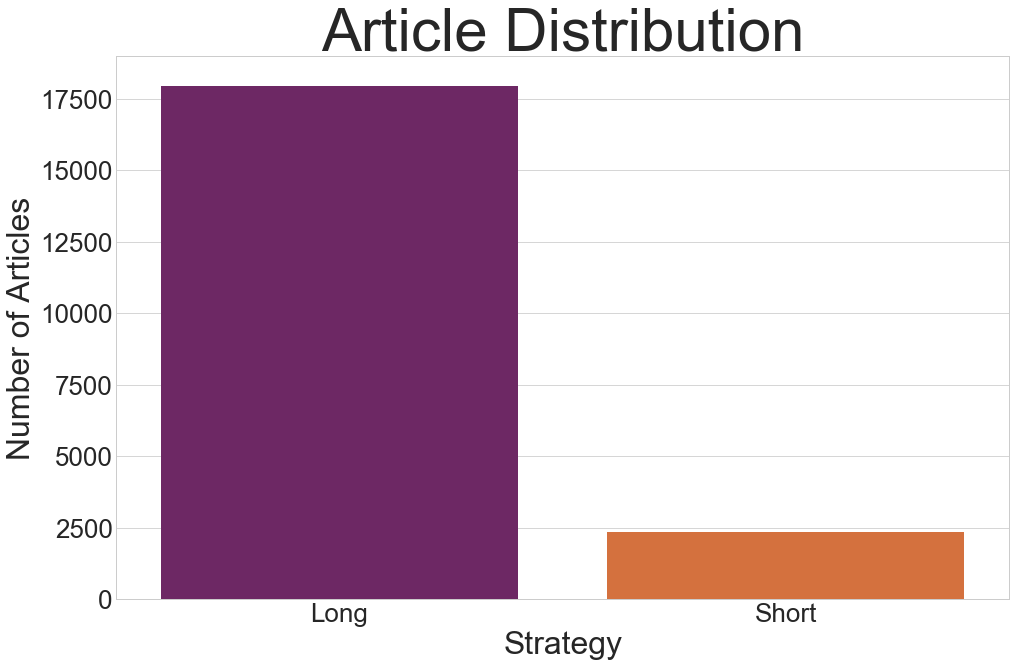

In [67]:
sns.set_style('whitegrid')
sns.despine()

x = ideas['Strategy'].value_counts().index
y = ideas['Strategy'].value_counts().values

plt.figure(figsize=(16,10))
sns.barplot(x = ideas['Strategy'].value_counts().index,
            y = ideas['Strategy'].value_counts().values,
            palette='inferno')

plt.xlabel('Strategy',fontsize=32)
plt.ylabel('Number of Articles',fontsize=32)
plt.ylim(0,19000)
plt.title('Article Distribution',fontsize=60)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

### What stock tickers are referenced most?

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text yticklabel objects>)

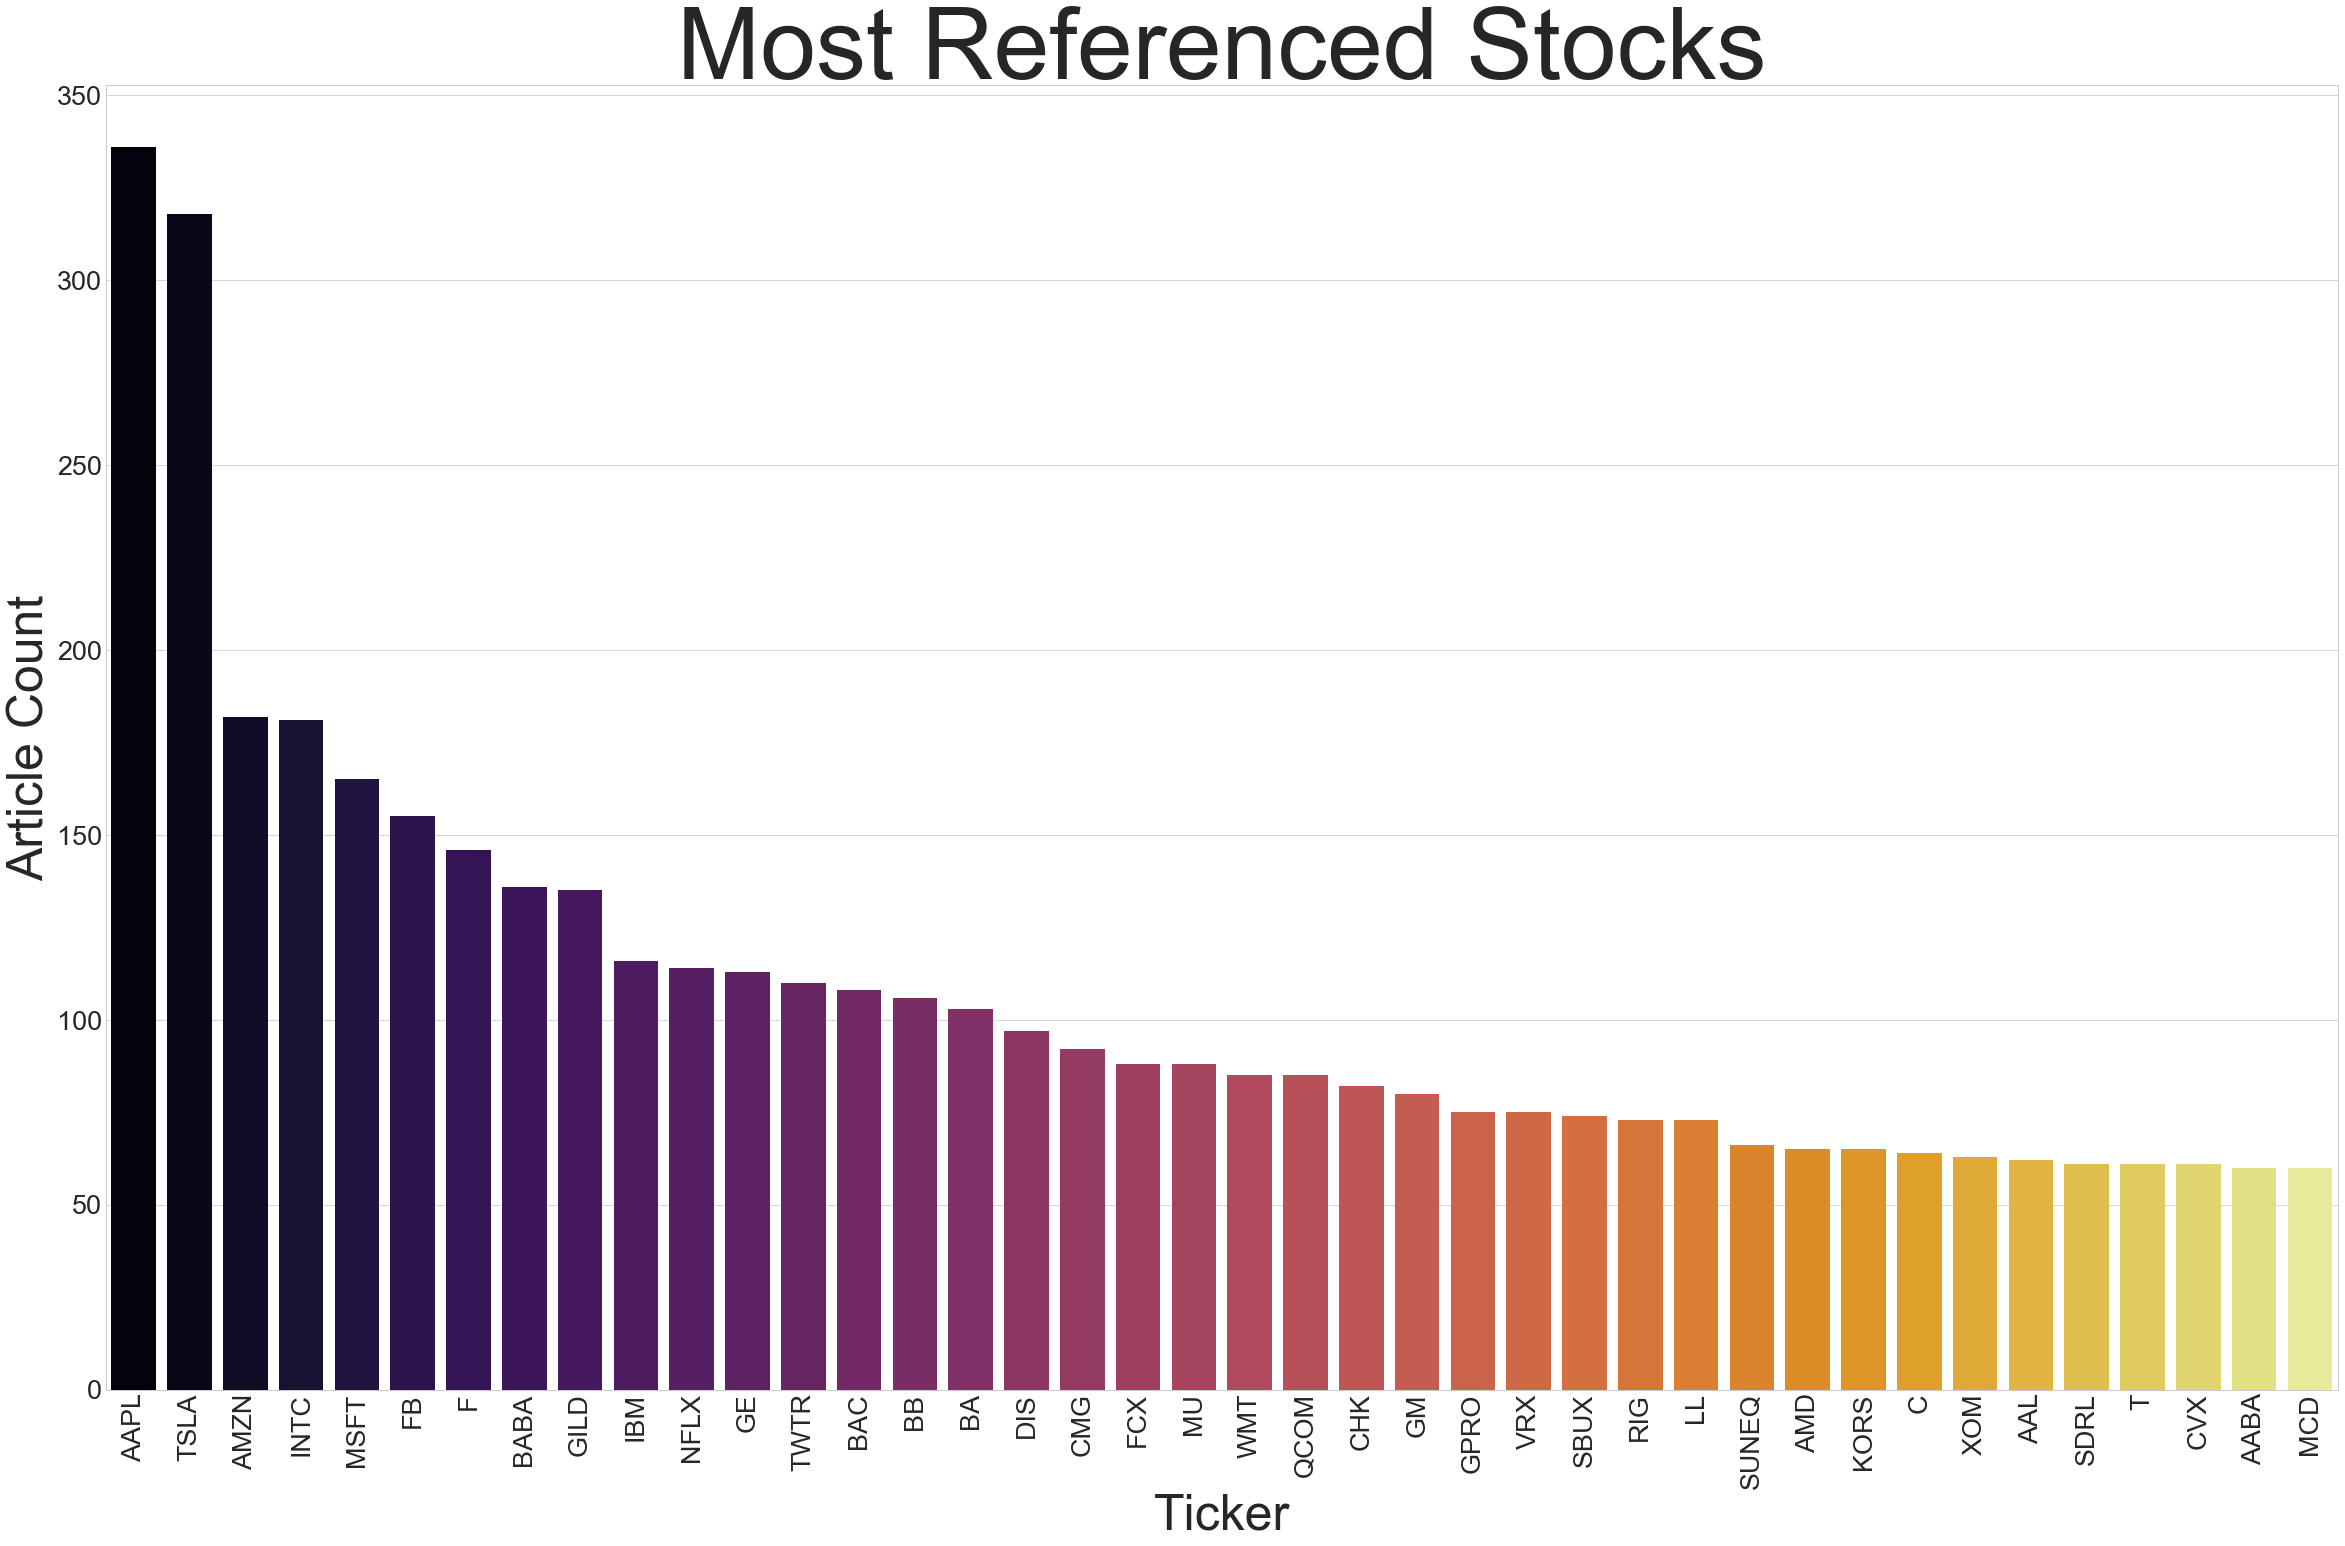

In [68]:
# Index and values of 40 most referenced stock tickers
a = ideas['Tickers'].value_counts().head(40).index
b = ideas['Tickers'].value_counts().head(40).values

# Bar graph to visualize 
plt.figure(figsize=(40,24))
sns.barplot(x = a, y = b, palette='inferno')


plt.xlabel('Ticker',fontsize=50)
plt.ylabel('Article Count',fontsize=50)
plt.title('Most Referenced Stocks',fontsize=100)
plt.xticks(fontsize=27,rotation=90)
plt.yticks(fontsize=27)

#### How frequently are stock tickers referenced?

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

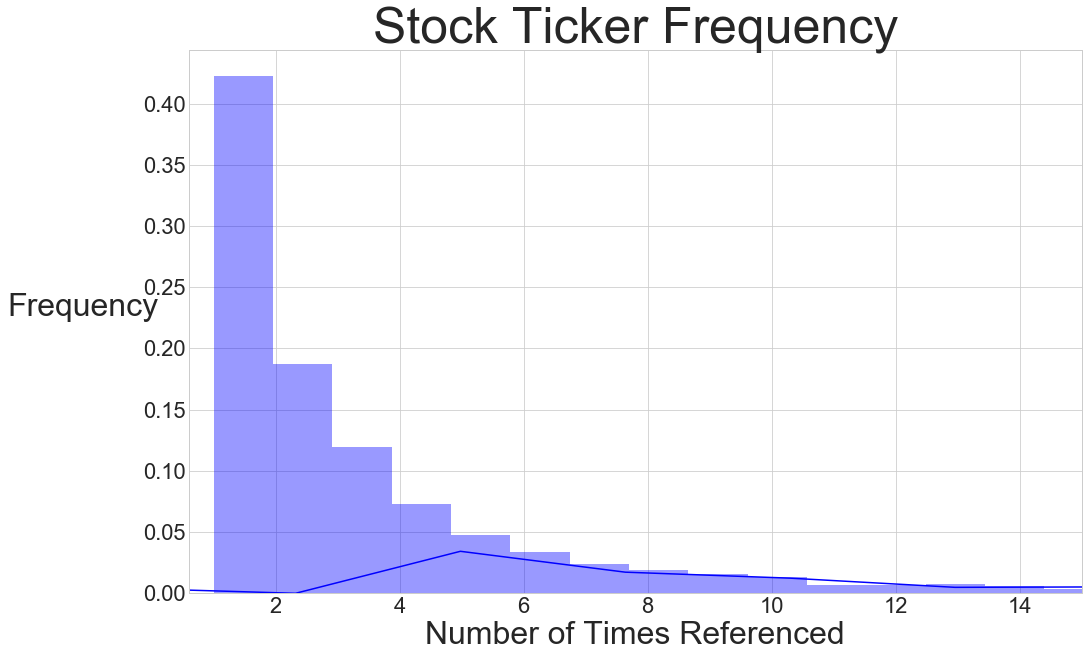

In [69]:
d = ideas['Tickers'].value_counts()

plt.figure(figsize=(16,10))
sns.distplot(d, bins=350,color='b')

plt.xlabel('Number of Times Referenced',fontsize=32)
plt.ylabel('Frequency',fontsize=32,rotation=0,labelpad=60)
plt.xlim(0.6,15)
plt.title('Stock Ticker Frequency',fontsize=50)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

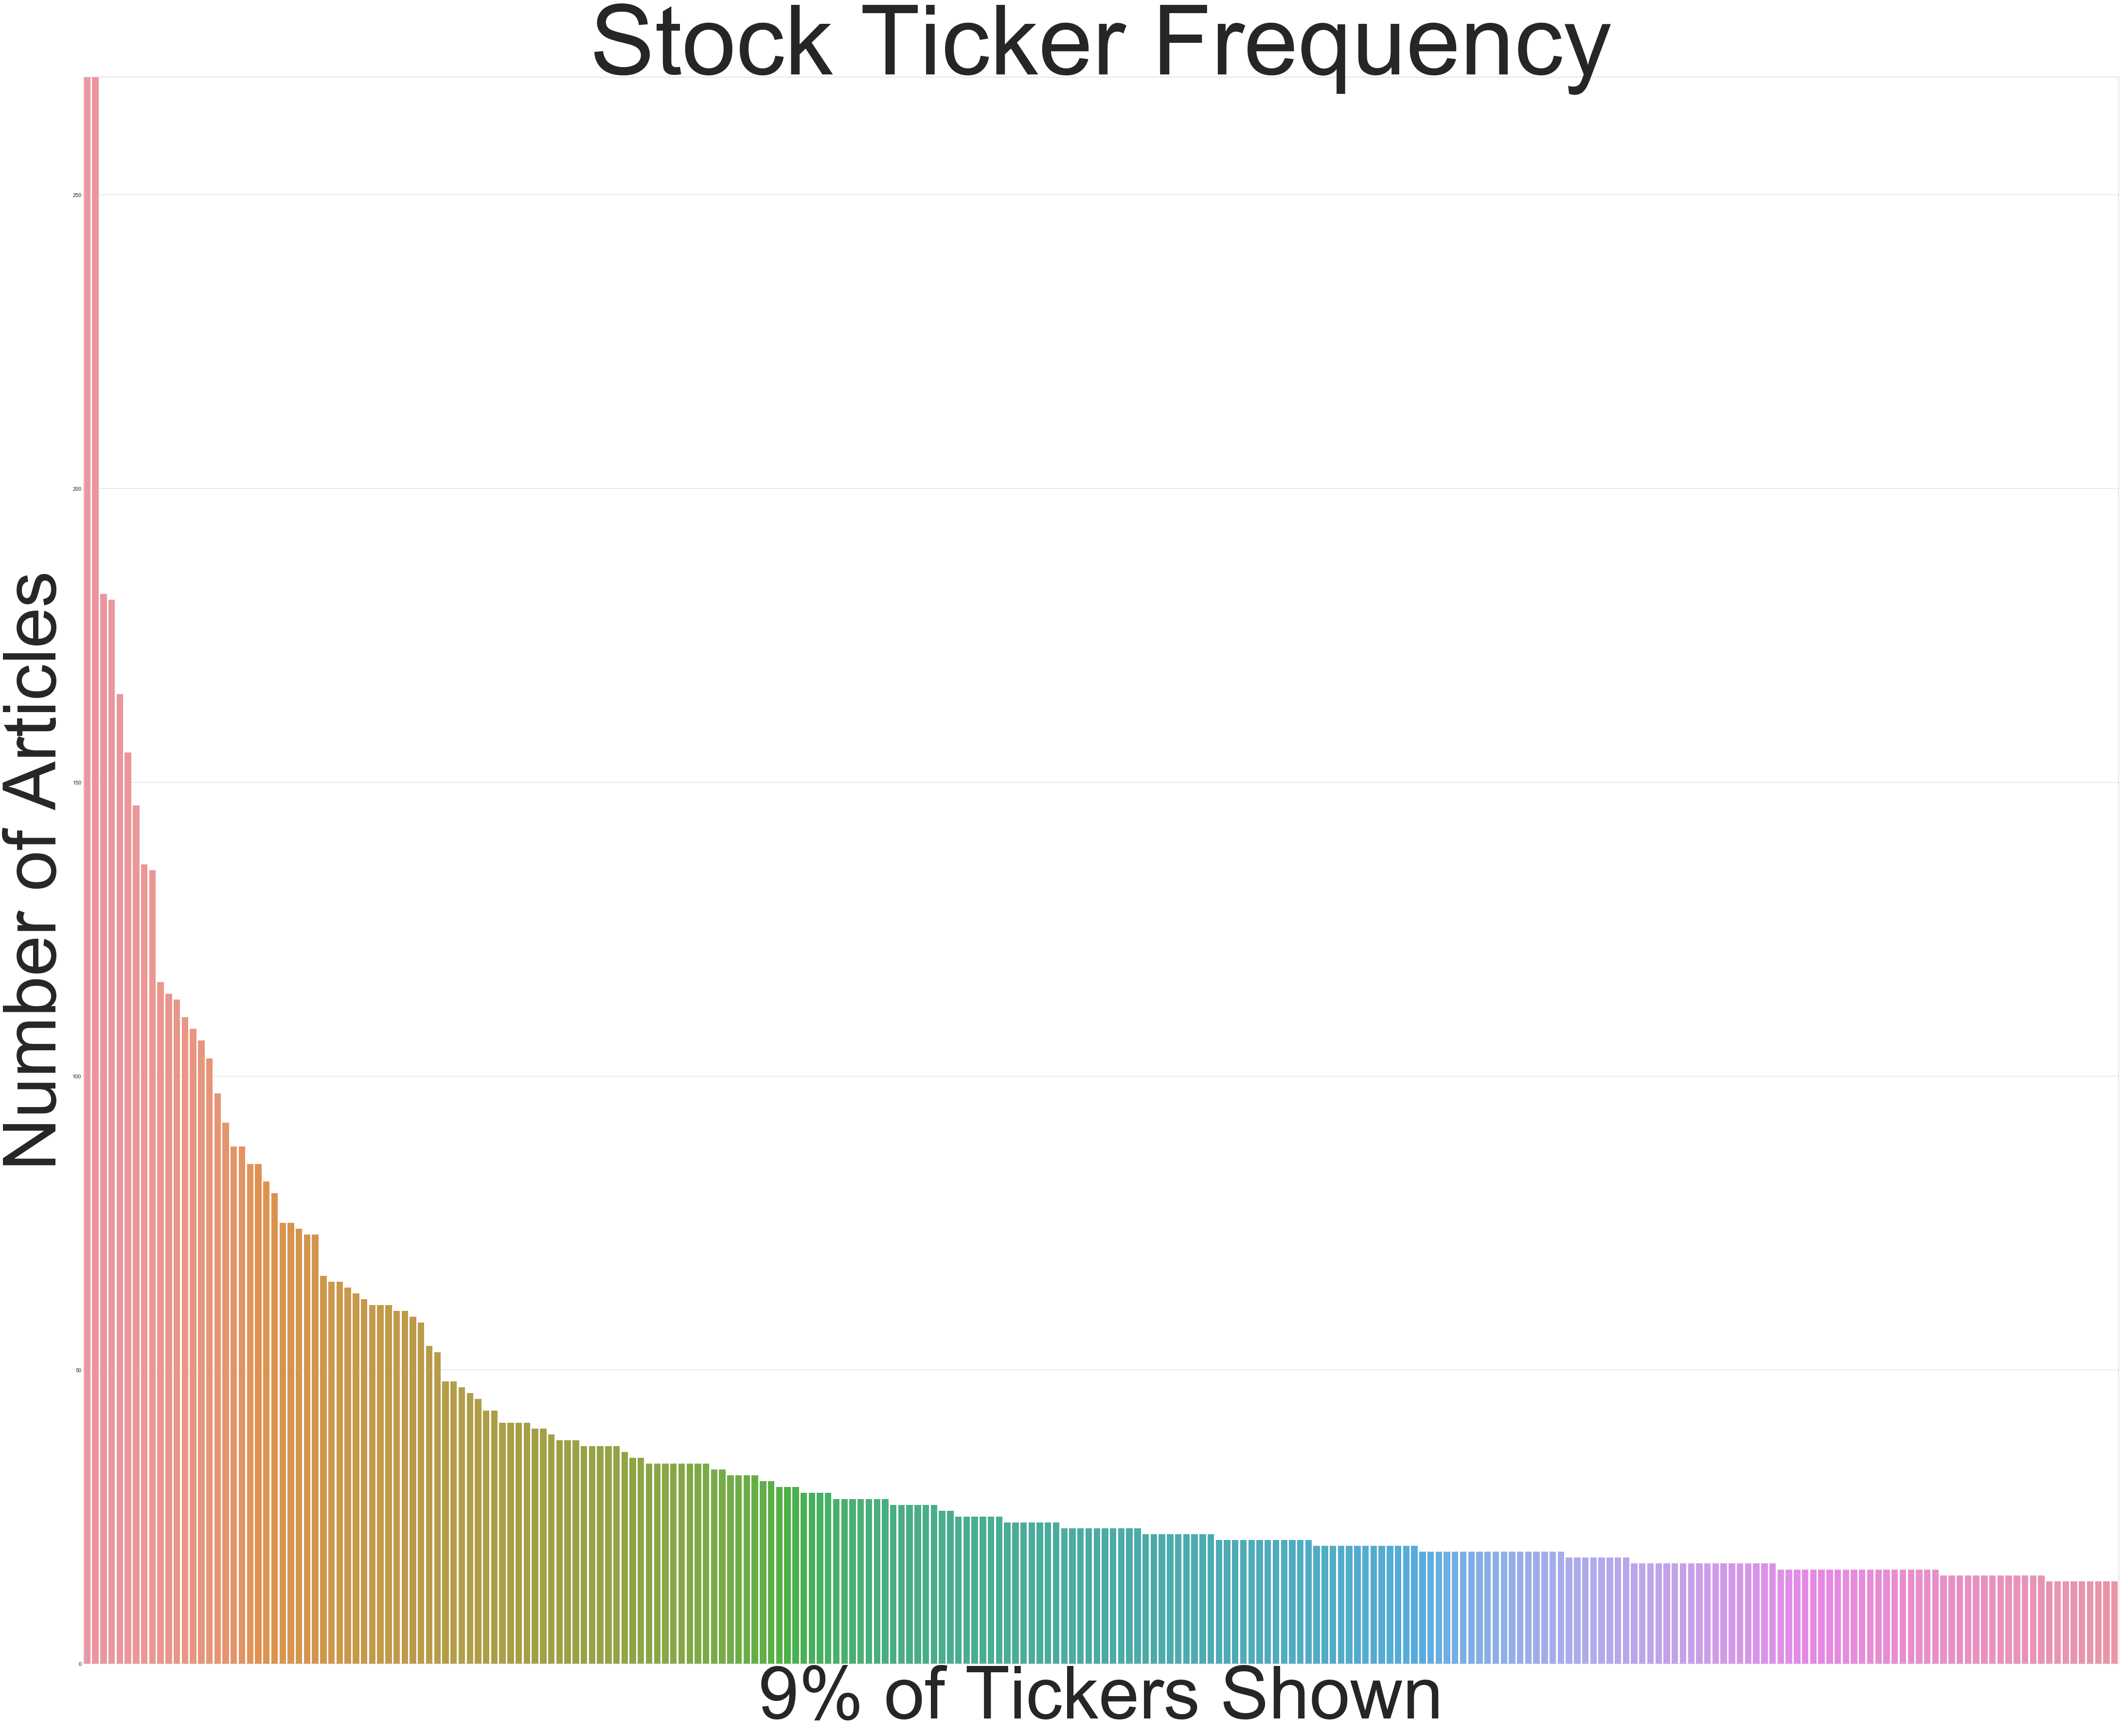

In [70]:
# Index and values of 250 most referenced stock tickers
x = ideas['Tickers'].value_counts().head(250).index
y = ideas['Tickers'].value_counts().head(250).values 

# Bar graph to visualize 
plt.figure(figsize=(75,60))
sns.barplot(x, y)

plt.xlabel('9% of Tickers Shown',fontsize=150)
plt.ylabel('Number of Articles',fontsize=150)
plt.ylim(0,270)
plt.title('Stock Ticker Frequency',fontsize=200)
plt.xticks([])
plt.yticks(fontsize=11)

### What is the scope of the data collected?
   - Ample amount of observations present for the construction and training of machine learning algorithms 
   - Highly diversified feature attributes-- due to lack of time and computational power, narrowing down their scope through investigating distributions and frequencies will be crucial. This will be accomplished by creating both a Long and Short Portfolio. 


### What ideas are most common?
- The vast majority of analysts and industry experts are recommending long ideas
- From January 2017-2018- long ideas outnumbered short idea by ~ 9 times

_Interesting Note: To access long idea articles from January of last year, I had to scrape back 235 pages! (only 28 for short ideas)_

### How frequently are stock tickers referenced?

- More than 75% of stock tickers in the dataset are referenced less than 5 times. A probable reason for this is that are authors are trend following. Who wants to take the time to write something nobody reads (or doesn't even get posted!). The stocks they pick to write about are certainly somewhat biased from the very beginning.
- Subsetting the dataset to include more frequently referenced stocks will narrow our scope tremendously and successfully capture the majority of the data. 
- HOWEVER, it is crucial to retain data from both types of ideas, so subsetting the dataframe solely on ticker frequenices could be troublesome.
- By creating a Long and Short Portfolio and performing subsets following the same logic we will successfully sidestep this potential problem. 

---
## Long and Short Portfolios 
---

In [71]:
long_portfolio = ideas[ideas['Strategy']=='Long'] # Subset of dataframe into long ideas 
short_portfolio = ideas[ideas['Strategy']=='Short'] # Subset of dataframe into short ideas 

In [72]:
# List of 20 most frequent long ideas
long_portfolio_list = long_portfolio.groupby('Tickers').Tickers.count().sort_values(ascending=False).head(25)

# List of 20 most frequent short ideas
short_portfolio_list = short_portfolio.groupby('Tickers').Tickers.count().sort_values(ascending=False).head(25)

In [75]:
long_portfolio_list.head(10)

Tickers
AAPL    298
INTC    171
AMZN    164
TSLA    163
MSFT    154
F       145
FB      144
GILD    133
BABA    126
GE      111
Name: Tickers, dtype: int64

In [74]:
short_portfolio_list.head(10)

Tickers
TSLA    155
NFLX     56
HLF      51
LL       46
AAPL     38
VRX      35
CMG      23
QCOM     22
TWTR     21
BB       20
Name: Tickers, dtype: int64

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text yticklabel objects>)

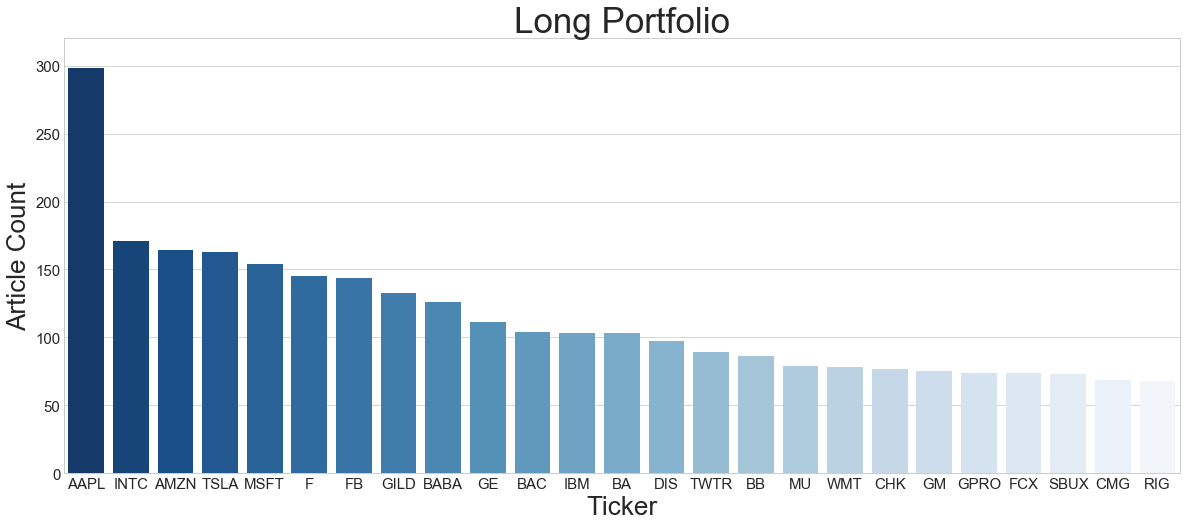

In [76]:
# Creating bar graph to visualize Long Portfolio

x = long_portfolio_list.index
y = long_portfolio_list.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Blues_r')

plt.xlabel('Ticker',fontsize=26)
plt.ylabel('Article Count',fontsize=26)
plt.ylim(0,320)
plt.title('Long Portfolio',fontsize=35)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text yticklabel objects>)

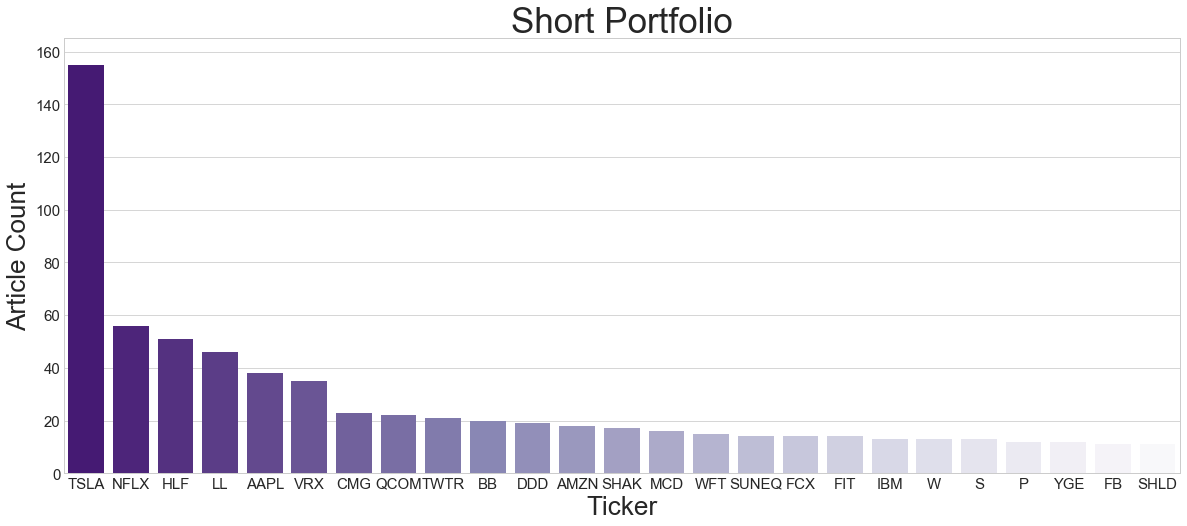

In [77]:
# Creating bar graph to visualize Short Portfolio
x = short_portfolio_list.index
y = short_portfolio_list.values

plt.figure(figsize=(20,8))
sns.barplot(x = x, y = y,palette='Purples_r')

plt.xlabel('Ticker',fontsize=26)
plt.ylabel('Article Count',fontsize=26)
plt.ylim(0,165)
plt.title('Short Portfolio',fontsize=35)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

---
## Compiling "Final Ideas" DataFrame 
---

In [78]:
# Merging Long and Short Portfolios
final_ideas = pd.concat([long_portfolio,short_portfolio]) 

In [79]:
# Transforming Long and Short Portfolio lists into dataframes 
long_portfolio = pd.DataFrame(long_portfolio_list)
short_portfolio = pd.DataFrame(short_portfolio_list)

---
## Saving Results 
---

In [80]:
# Exporting as csvs

final_ideas.to_csv('FINAL_IDEAS.csv')
long_portfolio.to_csv('LONG_PORTFOLIO.csv')
short_portfolio.to_csv('SHORT_PORTFOLIO.csv')

## Onwards!

---

## Please proceed to Notebook 3 :)  